# Probability Sweep - Variable Length

## Introduction

In [1]:
%cd .
%pwd
%cd "raw_data/208_HGT_VarLength_ProbSweep__Task/"
#%mkdir "analysis"
%cd "analysis"
%pwd

/home/rosiec/Dropbox/School_Docs/Research/HGT
/home/rosiec/tmp/raw_data/208_HGT_VarLength_ProbSweep__Task
/home/rosiec/tmp/raw_data/208_HGT_VarLength_ProbSweep__Task/analysis


u'/home/rosiec/tmp/raw_data/208_HGT_VarLength_ProbSweep__Task/analysis'

In [1]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy  
import scikits.bootstrap as bootstrap
from scipy import stats
import matplotlib.gridspec as gridspec
#from IPython.display import Image
from PIL import Image
from IPython.display import Image as ipyImage

%matplotlib inline
%rehashx
pd.__version__

u'0.17.1'

In [8]:
#%pwd
%cat ../P_0.001_hgtbonus_208001/data/log_average.dat | head -n 20

# Avida Fitness Data
# Tue Jan 26 09:13:58 2016
#  1: Update
#  2: Fitness
#  3: Fitness STE
#  4: Fitness Variance
#  5: Log Fitness
#  6: Log Fitness STE
#  7: Log Fitness Variance

0 0 0 0 -inf 0 0 
100 0.241389 0.00205585 0.000321215 -1.4249 0.0104353 0.00827613 
200 0.263106 0.00341567 0.00499338 -1.36058 0.0100498 0.043227 
300 0.408286 0.0125417 0.155563 -1.09284 0.0170554 0.287688 
400 3.20035 0.137553 23.1214 0.10703 0.0424018 2.19705 
500 159.75 10.9121 152176 1.33412 0.0803151 8.24375 
600 1152.4 56.5385 4.18755e+06 2.68981 0.10928 15.6442 
700 4054.17 191.556 4.91698e+07 3.78628 0.123526 20.4466 
800 12862.1 730.273 7.23687e+08 5.21794 0.13161 23.505 
900 299714 38966.6 2.11209e+12 6.09917 0.14043 27.4311 


In [6]:
import sys
sys.path.append("~/Dropbox/School_Docs/Research/research_scripts/")
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py --help

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  -a, --all             display all lines of a source
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --data_members=MEMBER_COUNT
                        Number of Components from a given data source
                        (treatment)
  --alt_axis=ALT_AXIS   Use an alternative axis for the Nth data source
  --xtick_multiplier=XTICK_MULTIPLIER
                        X-axis Tick 

## Fitnesses

Aggregating control
Aggregating P_0
Aggregating P_0.001
Aggregating P_0.01
Aggregating P_0.1
Aggregating P_0.5
Aggregating P_1

Plotting 208_fitness


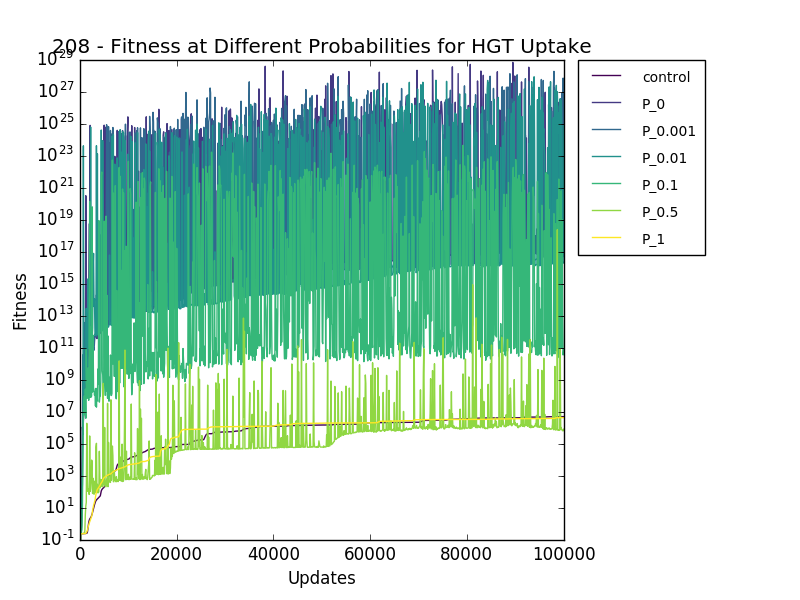

In [10]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--samples 100 \
--ylog --title "208 - Fitness at Different Probabilities for HGT Uptake" \
--xlabel "Updates" --ylabel "Fitness" --xtick_multiplier 100 \
208_fitness \
average.dat 4 \"../P_0_control_*/data*/\" control \
average.dat 4 \"../P_0_hgtbonus_*/data*/\" P_0 \
average.dat 4 \"../P_0.001_hgtbonus_*/data*/\" P_0.001 \
average.dat 4 \"../P_0.01_hgtbonus_*/data*/\" P_0.01 \
average.dat 4 \"../P_0.1_hgtbonus_*/data*/\" P_0.1 \
average.dat 4 \"../P_0.5_hgtbonus_*/data*/\" P_0.5 \
average.dat 4 \"../P_1_hgtbonus_*/data*/\" P_1 


ipyImage(filename='208_fitness.png') 

Aggregating control
Aggregating P_0
Aggregating P_0.001
Aggregating P_0.01
Aggregating P_0.1
Aggregating P_0.5
Aggregating P_1

Plotting 208_log_fitness


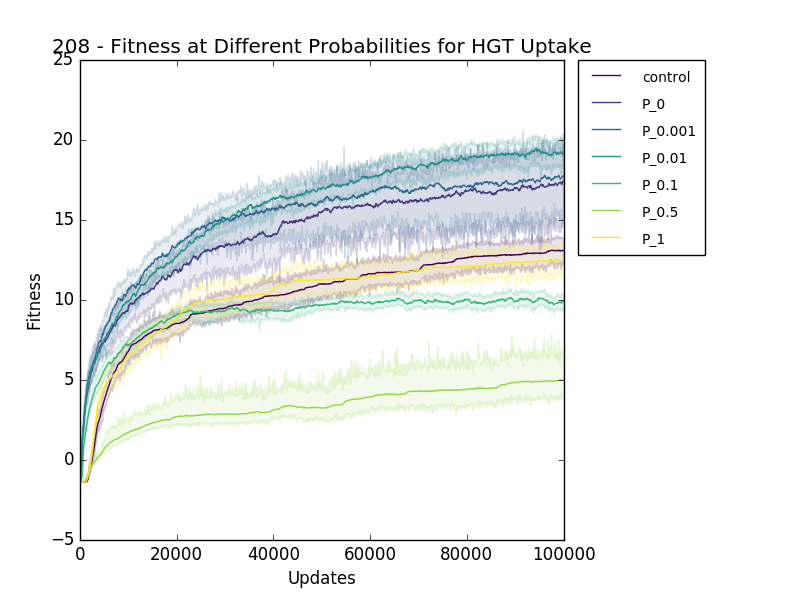

In [13]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--error --samples 100 \
--title "208 - Fitness at Different Probabilities for HGT Uptake" \
--xlabel "Updates" --ylabel "Fitness" --xtick_multiplier 100 \
208_log_fitness \
log_average.dat 5 \"../P_0_control_*/data*/\" control \
log_average.dat 5 \"../P_0_hgtbonus_*/data*/\" P_0 \
log_average.dat 5 \"../P_0.001_hgtbonus_*/data*/\" P_0.001 \
log_average.dat 5 \"../P_0.01_hgtbonus_*/data*/\" P_0.01 \
log_average.dat 5 \"../P_0.1_hgtbonus_*/data*/\" P_0.1 \
log_average.dat 5 \"../P_0.5_hgtbonus_*/data*/\" P_0.5 \
log_average.dat 5 \"../P_1_hgtbonus_*/data*/\" P_1 

ipyImage(filename='208_log_fitness.png') 

In [ ]:
#### ERROR CHECKING TESTS - DISREGARD ###

%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py --error --samples 100 \
--all \
--ylog --title "200 - Probabilities" \
--xlabel "Updates" --ylabel "Fitness" --xtick_multiplier 100 \
200_fitness_all \
average.dat 4 \"../P_0.1_hgtbonus_*/data*/\" P_0.1 \

#average.dat 4 \"../P_0_hgtbonus_*/data*/\" P_0 \
#average.dat 4 \"../P_0.001_hgtbonus_*/data*/\" P_0.001 \
#average.dat 4 \"../P_0.01_hgtbonus_*/data*/\" P_0.01 \
#average.dat 4 \"../P_0.1_hgtbonus_*/data*/\" P_0.1 \

ipyImage(filename='200_fitness_all.png') 

%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py --error --samples 100 \
\
--ylog --title "200 - Probabilities" \
--xlabel "Updates" --ylabel "Fitness" --xtick_multiplier 100 \
200_fitness_mean \
average.dat 4 \"../P_0.1_hgtbonus_*/data*/\" P_0.1 \

#average.dat 4 \"../P_0_hgtbonus_*/data*/\" P_0 \
#average.dat 4 \"../P_0.001_hgtbonus_*/data*/\" P_0.001 \
#average.dat 4 \"../P_0.01_hgtbonus_*/data*/\" P_0.01 \
#average.dat 4 \"../P_0.1_hgtbonus_*/data*/\" P_0.1 \


#ipyImage(filename='200_fitness_all.png') 
#ipyImage(filename='200_fitness_mean.png')


files = ['200_fitness_all.png', '200_fitness_mean.png']
print files

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,30),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=-0.5, wspace=0)
for i, ax in enumerate(axes.flat, start=1):
    
    if i-1 < len(files):
        img = Image.open(files[i-1])
        ax.imshow(img)

    ax.set_axis_off() 
    i+=1
plt.show()

## Uptake Rates

In [15]:
cat ../P_0.1_hgtbonus_208001/data*/hgt.dat | head -n 15

# Horizontal gene transfer statistics
# Tue Jan 26 08:55:25 2016
#  1: Update [update]
#  2: Total count of metabolized genome fragments [metcount]
#  3: Total size of metabolized genome fragments [metsize]
#  4: Total count of insertion events [inscount]
#  5: Total size of insertion events [inssize]
#  6: Simple count of insertion events [inscount] DEBUG-RCK
#  7: Simple count of uptake events [inscount] DEBUG-RCK
#  8: Simple count of recombination events [inscount] DEBUG-RCK
#  9: Simple count of bonus events [inscount] DEBUG-RCK

0 0 0 0 0 0 0 0 0 
100 0 0 0 0 0 0 0 0 
200 0 0 0 0 0 156 12 144 


Aggregating control_Up
Aggregating control_Rec
Aggregating control_Bon
Aggregating P_0_Up
Aggregating P_0_Rec
Aggregating P_0_Bon
Aggregating P_0.001_Up
Aggregating P_0.001_Rec
Aggregating P_0.001_Bon
Aggregating P_0.01_Up
Aggregating P_0.01_Rec
Aggregating P_0.01_Bon
Aggregating P_0.1_Up
Aggregating P_0.1_Rec
Aggregating P_0.1_Bon
Aggregating P_0.5_Up
Aggregating P_0.5_Rec
Aggregating P_0.5_Bon
Aggregating P_1_Up
Aggregating P_1_Rec
Aggregating P_1_Bon

Plotting 208_hgtbonus_uptakerecbon


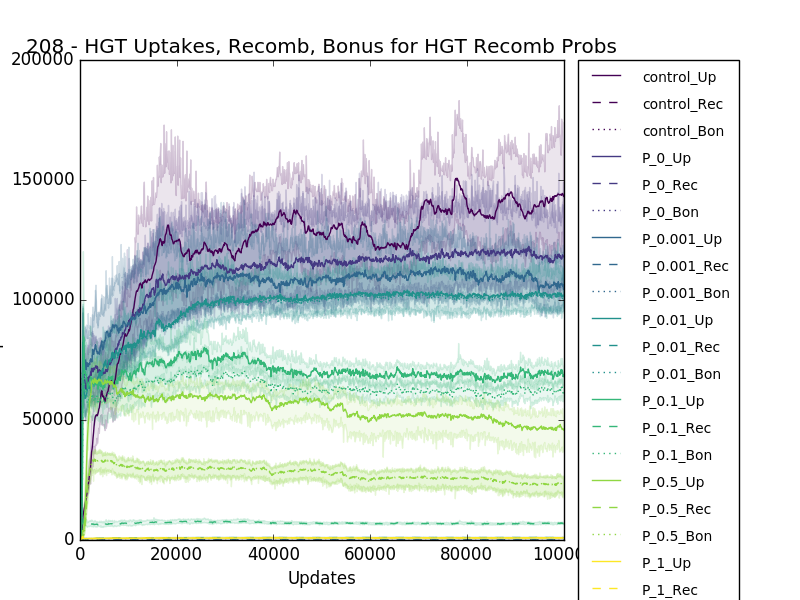

In [16]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--error \
--samples 100 \
--title "208 - HGT Uptakes, Recomb, Bonus for HGT Recomb Probs" \
--xlabel "Updates" --ylabel "Uptake Events" --xtick_multiplier 100 \
--data_members 3 \
208_hgtbonus_uptakerecbon \
hgt.dat 7 \"../P_0_control_*/data*/\" control_Up \
hgt.dat 8 \"../P_0_control_*/data*/\" control_Rec \
hgt.dat 9 \"../P_0_control_*/data*/\" control_Bon \
hgt.dat 7 \"../P_0_hgtbonus*/data*/\" P_0_Up \
hgt.dat 8 \"../P_0_hgtbonus*/data*/\" P_0_Rec \
hgt.dat 9 \"../P_0_hgtbonus*/data*/\" P_0_Bon \
hgt.dat 7 \"../P_0.001_hgtbonus*/data*/\" P_0.001_Up \
hgt.dat 8 \"../P_0.001_hgtbonus*/data*/\" P_0.001_Rec \
hgt.dat 9 \"../P_0.001_hgtbonus*/data*/\" P_0.001_Bon \
hgt.dat 7 \"../P_0.01_hgtbonus*/data*/\" P_0.01_Up \
hgt.dat 8 \"../P_0.01_hgtbonus*/data*/\" P_0.01_Rec \
hgt.dat 9 \"../P_0.01_hgtbonus*/data*/\" P_0.01_Bon \
hgt.dat 7 \"../P_0.1_hgtbonus*/data*/\" P_0.1_Up \
hgt.dat 8 \"../P_0.1_hgtbonus*/data*/\" P_0.1_Rec \
hgt.dat 9 \"../P_0.1_hgtbonus*/data*/\" P_0.1_Bon \
hgt.dat 7 \"../P_0.5_hgtbonus*/data*/\" P_0.5_Up \
hgt.dat 8 \"../P_0.5_hgtbonus*/data*/\" P_0.5_Rec \
hgt.dat 9 \"../P_0.5_hgtbonus*/data*/\" P_0.5_Bon \
hgt.dat 7 \"../P_1_hgtbonus*/data*/\" P_1_Up \
hgt.dat 8 \"../P_1_hgtbonus*/data*/\" P_1_Rec \
hgt.dat 9 \"../P_1_hgtbonus*/data*/\" P_1_Bon 


ipyImage(filename='208_hgtbonus_uptakerecbon.png') 

Aggregating control_Up
Aggregating control_Rec
Aggregating control_Bon
Aggregating P_0_Up
Aggregating P_0_Rec
Aggregating P_0_Bon
Aggregating P_0.001_Up
Aggregating P_0.001_Rec
Aggregating P_0.001_Bon
Aggregating P_0.01_Up
Aggregating P_0.01_Rec
Aggregating P_0.01_Bon
Aggregating P_0.1_Up
Aggregating P_0.1_Rec
Aggregating P_0.1_Bon
Aggregating P_0.5_Up
Aggregating P_0.5_Rec
Aggregating P_0.5_Bon
Aggregating P_1_Up
Aggregating P_1_Rec
Aggregating P_1_Bon

Plotting 208_hgt_uptakerecbon


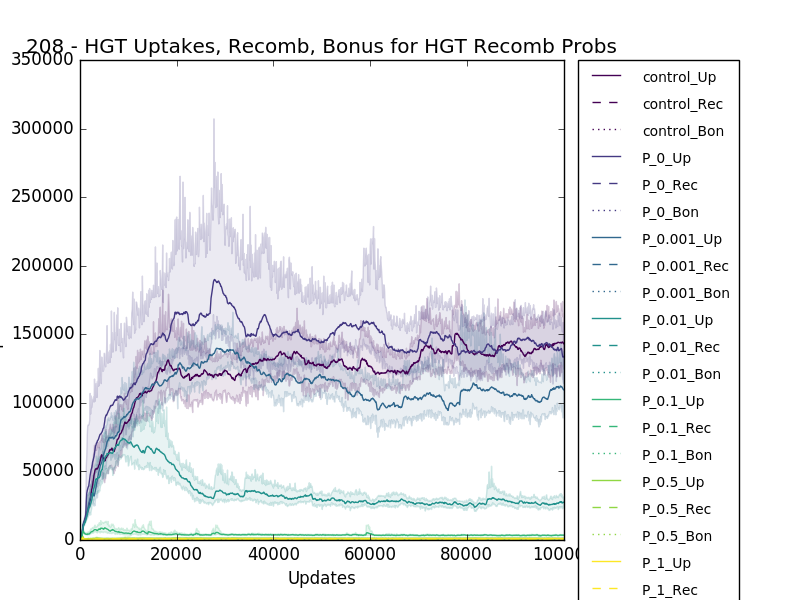

In [17]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py --error --samples 100 \
--title "208 - HGT Uptakes, Recomb, Bonus for HGT Recomb Probs" \
--xlabel "Updates" --ylabel "Uptake Events" --xtick_multiplier 100 \
--data_members 3 \
208_hgt_uptakerecbon \
hgt.dat 7 \"../P_0_control_*/data*/\" control_Up \
hgt.dat 8 \"../P_0_control_*/data*/\" control_Rec \
hgt.dat 9 \"../P_0_control_*/data*/\" control_Bon \
hgt.dat 7 \"../P_0_hgt_*/data*/\" P_0_Up \
hgt.dat 8 \"../P_0_hgt_*/data*/\" P_0_Rec \
hgt.dat 9 \"../P_0_hgt_*/data*/\" P_0_Bon \
hgt.dat 7 \"../P_0.001_hgt_*/data*/\" P_0.001_Up \
hgt.dat 8 \"../P_0.001_hgt_*/data*/\" P_0.001_Rec \
hgt.dat 9 \"../P_0.001_hgt_*/data*/\" P_0.001_Bon \
hgt.dat 7 \"../P_0.01_hgt_*/data*/\" P_0.01_Up \
hgt.dat 8 \"../P_0.01_hgt_*/data*/\" P_0.01_Rec \
hgt.dat 9 \"../P_0.01_hgt_*/data*/\" P_0.01_Bon \
hgt.dat 7 \"../P_0.1_hgt_*/data*/\" P_0.1_Up \
hgt.dat 8 \"../P_0.1_hgt_*/data*/\" P_0.1_Rec \
hgt.dat 9 \"../P_0.1_hgt_*/data*/\" P_0.1_Bon \
hgt.dat 7 \"../P_0.5_hgt_*/data*/\" P_0.5_Up \
hgt.dat 8 \"../P_0.5_hgt_*/data*/\" P_0.5_Rec \
hgt.dat 9 \"../P_0.5_hgt_*/data*/\" P_0.5_Bon \
hgt.dat 7 \"../P_1_hgt_*/data*/\" P_1_Up \
hgt.dat 8 \"../P_1_hgt_*/data*/\" P_1_Rec \
hgt.dat 9 \"../P_1_hgt_*/data*/\" P_1_Bon 

ipyImage(filename='208_hgt_uptakerecbon.png') 

## Uptake Rates for all sub-treatments (control, hgt+bonus, etc.)

In [18]:
def plot_it(TREATM, #205 
               PROB, #0.001 
               filename, #hgt.dat
               descr, #HGT Uptakes
               columns, #[7,8]
               colnames, #['U','R'] 
               subtreats, #['control', 'hgt', 'hgtbonus', 'bonus']
               basename, #hgt_uptake_recomb 
               verbose=True):
    ROOT_TREATMENT="P_"+PROB

    !echo $ROOT_TREATMENT
    !echo $TREATM

    #!python2
    script = ' \
~/Dropbox/School_Docs/Research/research_scripts/quickplot.py --error --samples 100 \
--title "' + descr + ' (Uptake_P: '+PROB+')" \
--xlabel "Updates" \
--ylabel "Uptake Events" --xtick_multiplier 100 \
--data_members '+ str(len(columns)) +' \
'+TREATM+'_'+basename+'_'+PROB+' \
'
    for trt in subtreats:
        for col, coln in zip(columns, colnames):
            script += filename + ' '\
            + str(col) + ' "../'\
            + ROOT_TREATMENT + '_' + trt + '_*/data*/" ' + trt + '_' + coln + ' '
    
    if verbose:
        script += '\
2>/dev/null'
        print script
    else:
        script += '\
>/dev/null 2>&1'
        print script
        
    !python2 $script
    
    return TREATM+'_'+basename+'_'+PROB+'.png'



In [19]:
def hgt_recomb(TREATM, #205 
               PROB, #0.001
               verbose=True):
    
    return plot_it(TREATM, PROB, "hgt.dat", "HGT Uptakes", 
                   [7,8], ['U','R'], 
                    #['control', 'hgt', 'hgtbonus', 'bonus'], 
                   ['hgt', 'hgtbonus'], 
                   "hgt_uptake_recomb", verbose=verbose)
    

P_0
208
 ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py --error --samples 100 --title "HGT Uptakes (Uptake_P: 0)" --xlabel "Updates" --ylabel "Uptake Events" --xtick_multiplier 100 --data_members 2 208_hgt_uptake_recomb_0 hgt.dat 7 "../P_0_control_*/data*/" control_U hgt.dat 8 "../P_0_control_*/data*/" control_R hgt.dat 7 "../P_0_hgt_*/data*/" hgt_U hgt.dat 8 "../P_0_hgt_*/data*/" hgt_R hgt.dat 7 "../P_0_hgtbonus_*/data*/" hgtbonus_U hgt.dat 8 "../P_0_hgtbonus_*/data*/" hgtbonus_R hgt.dat 7 "../P_0_bonus_*/data*/" bonus_U hgt.dat 8 "../P_0_bonus_*/data*/" bonus_R >/dev/null 2>&1
P_0.001
208
 ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py --error --samples 100 --title "HGT Uptakes (Uptake_P: 0.001)" --xlabel "Updates" --ylabel "Uptake Events" --xtick_multiplier 100 --data_members 2 208_hgt_uptake_recomb_0.001 hgt.dat 7 "../P_0.001_hgt_*/data*/" hgt_U hgt.dat 8 "../P_0.001_hgt_*/data*/" hgt_R hgt.dat 7 "../P_0.001_hgtbonus_*/data*/" hgtbonus_U hgt.dat 8 "../P_

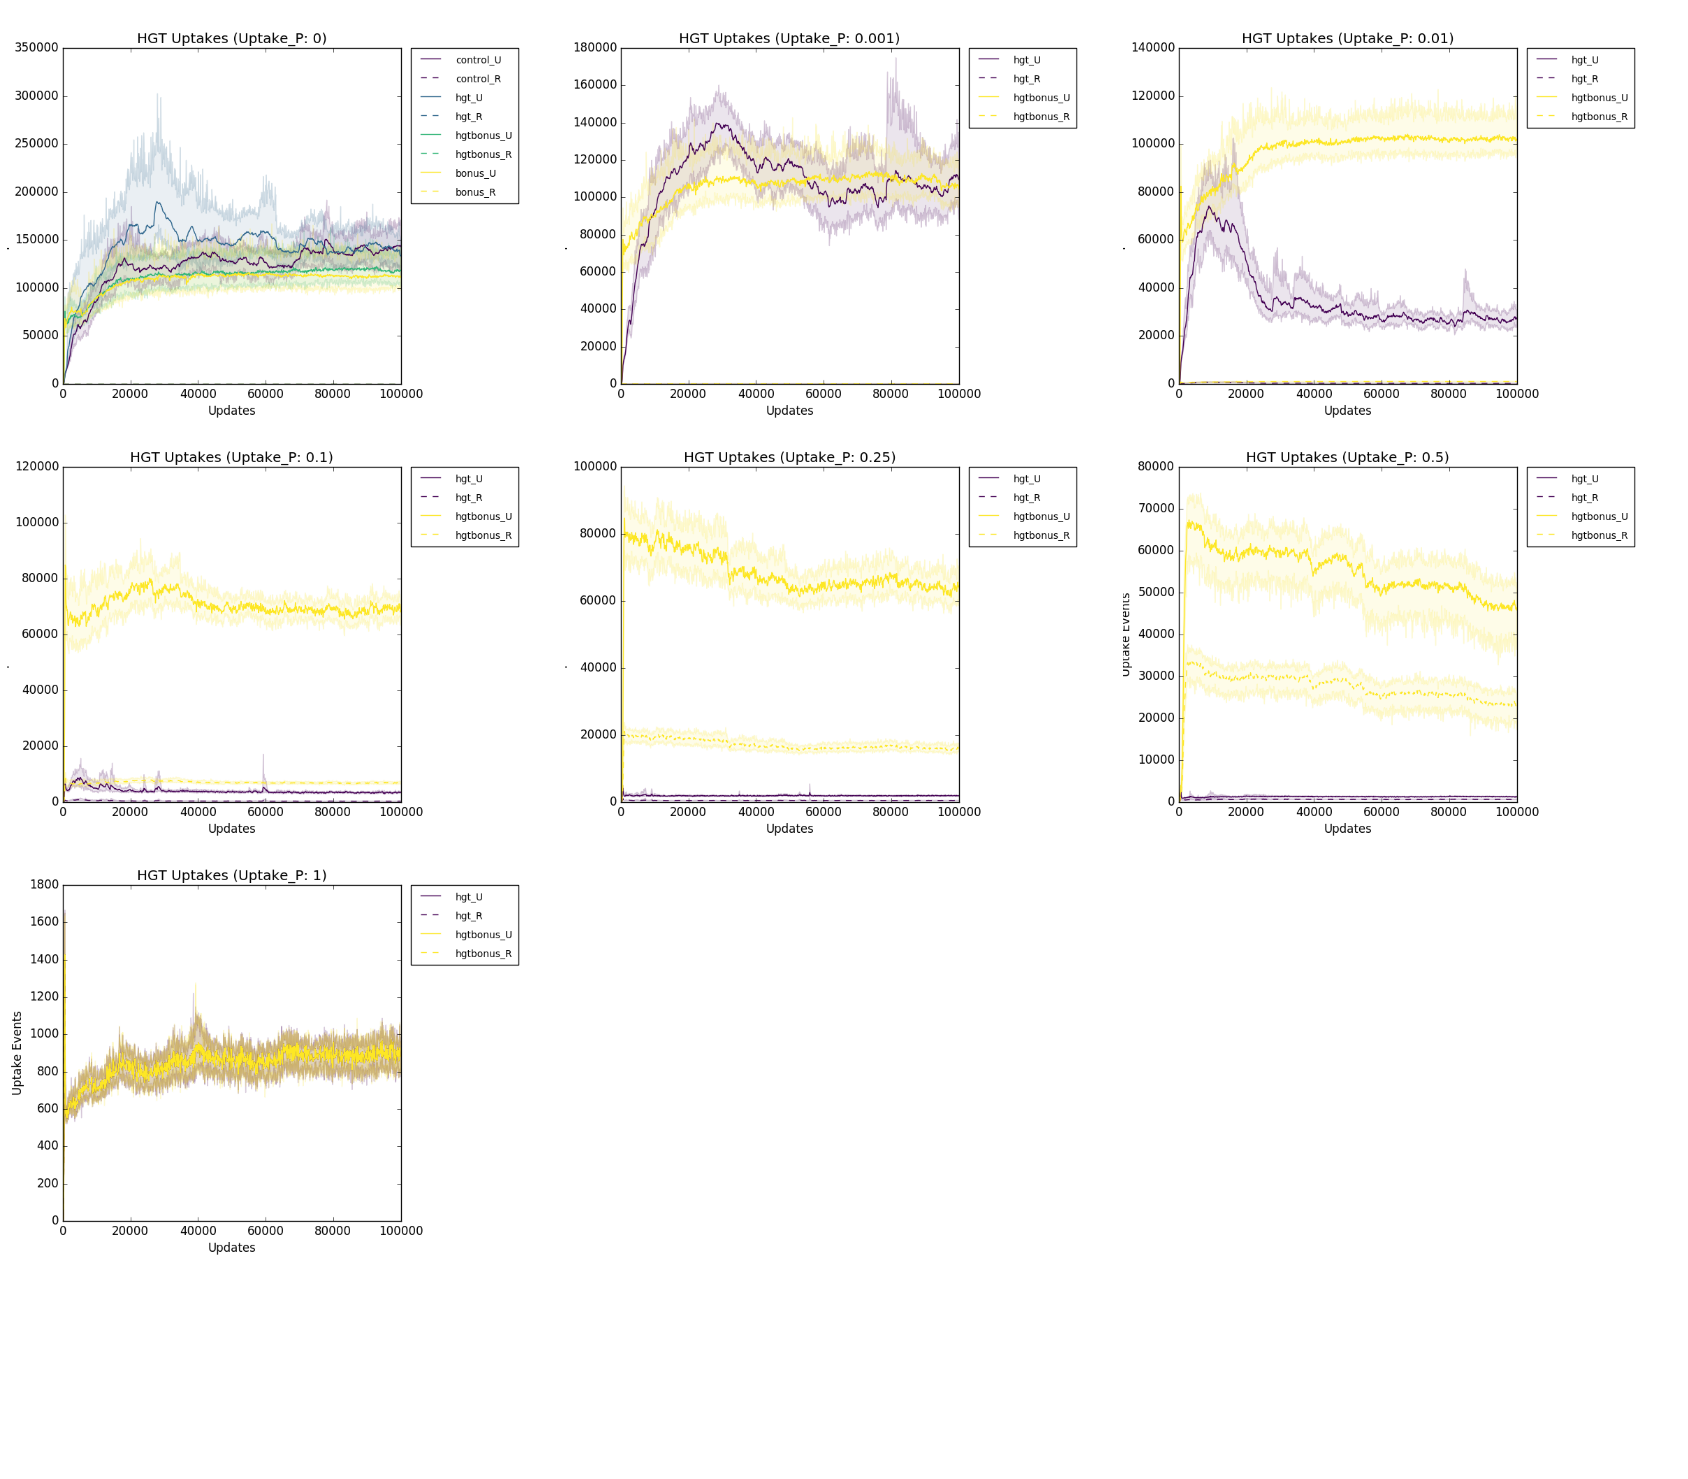

In [21]:
files = []
files.append( plot_it("208", "0", "hgt.dat", "HGT Uptakes", 
                   [7,8], ['U','R'], 
                    ['control', 'hgt', 'hgtbonus', 'bonus'],  
                   "hgt_uptake_recomb", verbose=False ))

probs = ['0.001', '0.01', '0.1', '0.25', '0.5', '0.75', '1']
for p in probs:
#    display(Image(filename=hgt_recomb("208", p, verbose=False)))
    files.append(hgt_recomb("208", p, verbose=True))

#files = ['205_hgt_uptake_recomb_0.png',
# '205_hgt_uptake_recomb_0.001.png',
# '205_hgt_uptake_recomb_0.01.png',
# '205_hgt_uptake_recomb_0.1.png',
# '205_hgt_uptake_recomb_0.25.png',
# '205_hgt_uptake_recomb_0.5.png',
# '205_hgt_uptake_recomb_1.png']

#files = ['200_hgt_uptake_recomb_0.png', '200_hgt_uptake_recomb_0.001.png', '200_hgt_uptake_recomb_0.01.png', '200_hgt_uptake_recomb_0.1.png', '200_hgt_uptake_recomb_0.25.png', '200_hgt_uptake_recomb_0.5.png', '200_hgt_uptake_recomb_1.png']


print files

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30,30),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=-0.5, wspace=0)
for i, ax in enumerate(axes.flat, start=1):
    
    if i-1 < len(files):
        img = Image.open(files[i-1])
        ax.imshow(img)

    ax.set_axis_off() 
    i+=1
plt.show()

## Run End-Point Uptake and Recombination Rates

In [26]:
for p in ['0', '0.001', '0.01', '0.1', '0.25', '0.5', '0.75', '1']:
    for t in ['hgtbonus', 'hgt']:
        PROB = "P_" + p + "_" + t
        print PROB
        
        outfile1 = PROB + "__uptake_total.csv"
        !rm {outfile1}
        outfile2 = PROB + "__uptake_with_recombination.csv"
        !rm {outfile2}
        
        files = !ls ../{PROB}_200*/data_*/hgt.dat
        files_string = " ".join(files)

        !python2 ~/Dropbox/School_Docs/Research/research_scripts/common/extract_single_column_to_csv.py \
        --end 7 {files_string} \
        >> {outfile1}
        
        !python2 ~/Dropbox/School_Docs/Research/research_scripts/common/extract_single_column_to_csv.py \
        --end 8 {files_string} \
        >> {outfile2}


P_0_hgtbonus
rm: cannot remove ‘P_0_hgtbonus__uptake_total.csv’: No such file or directory
rm: cannot remove ‘P_0_hgtbonus__uptake_with_recombination.csv’: No such file or directory
P_0_hgt
rm: cannot remove ‘P_0_hgt__uptake_total.csv’: No such file or directory
rm: cannot remove ‘P_0_hgt__uptake_with_recombination.csv’: No such file or directory
P_0.001_hgtbonus
rm: cannot remove ‘P_0.001_hgtbonus__uptake_total.csv’: No such file or directory
rm: cannot remove ‘P_0.001_hgtbonus__uptake_with_recombination.csv’: No such file or directory
P_0.001_hgt
rm: cannot remove ‘P_0.001_hgt__uptake_total.csv’: No such file or directory
rm: cannot remove ‘P_0.001_hgt__uptake_with_recombination.csv’: No such file or directory
P_0.01_hgtbonus
rm: cannot remove ‘P_0.01_hgtbonus__uptake_total.csv’: No such file or directory
rm: cannot remove ‘P_0.01_hgtbonus__uptake_with_recombination.csv’: No such file or directory
P_0.01_hgt
rm: cannot remove ‘P_0.01_hgt__uptake_total.csv’: No such file or directory


### Uptake Rates

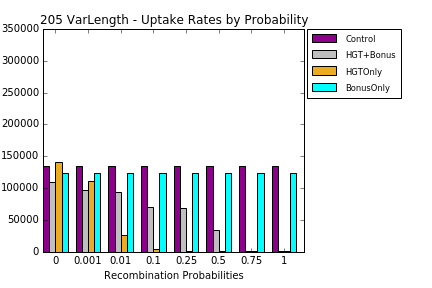

In [33]:
%run ~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Uptakes" \
-t "205 VarLength - Uptake Rates by Probability" --pair --groups=8 \
--ylim_max 350000 \
--xticks="0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="Control,HGT+Bonus,HGTOnly,BonusOnly" \
--columns="1" \
205_uptakes_by_prob.png \
\
P_0_control__uptake_total.csv \
P_0_hgtbonus__uptake_total.csv \
P_0_hgt__uptake_total.csv \
P_0_bonus__uptake_total.csv \
\
P_0.001_control__uptake_total.csv \
P_0.001_hgtbonus__uptake_total.csv \
P_0.001_hgt__uptake_total.csv \
P_0.001_bonus__uptake_total.csv \
\
P_0.01_control__uptake_total.csv \
P_0.01_hgtbonus__uptake_total.csv \
P_0.01_hgt__uptake_total.csv \
P_0.01_bonus__uptake_total.csv \
\
P_0.1_control__uptake_total.csv \
P_0.1_hgtbonus__uptake_total.csv \
P_0.1_hgt__uptake_total.csv \
P_0.1_bonus__uptake_total.csv \
\
P_0.25_control__uptake_total.csv \
P_0.25_hgtbonus__uptake_total.csv \
P_0.25_hgt__uptake_total.csv \
P_0.25_bonus__uptake_total.csv \
\
P_0.5_control__uptake_total.csv \
P_0.5_hgtbonus__uptake_total.csv \
P_0.5_hgt__uptake_total.csv \
P_0.5_bonus__uptake_total.csv \
\
P_0.75_control__uptake_total.csv \
P_0.75_hgtbonus__uptake_total.csv \
P_0.75_hgt__uptake_total.csv \
P_0.75_bonus__uptake_total.csv \
\
P_1_control__uptake_total.csv \
P_1_hgtbonus__uptake_total.csv \
P_1_hgt__uptake_total.csv \
P_1_bonus__uptake_total.csv 

ipyImage(filename='205_uptakes_by_prob.png') 

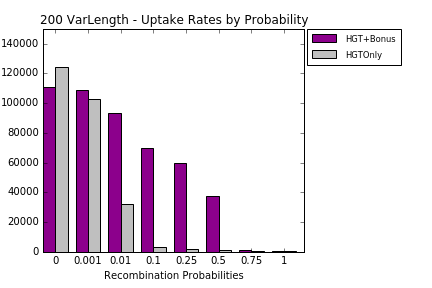

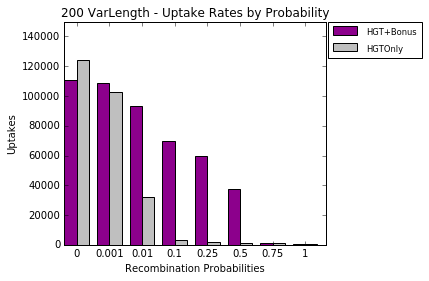

In [30]:
%run ~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Uptakes" \
-t "200 VarLength - Uptake Rates by Probability" --pair --groups=8 \
--ylim_max 150000 \
--xticks="0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="HGT+Bonus,HGTOnly" \
--columns="1" \
200_relevant_uptakes_by_prob.png \
\
P_0_hgtbonus__uptake_total.csv \
P_0_hgt__uptake_total.csv \
\
P_0.001_hgtbonus__uptake_total.csv \
P_0.001_hgt__uptake_total.csv \
\
P_0.01_hgtbonus__uptake_total.csv \
P_0.01_hgt__uptake_total.csv \
\
P_0.1_hgtbonus__uptake_total.csv \
P_0.1_hgt__uptake_total.csv \
\
P_0.25_hgtbonus__uptake_total.csv \
P_0.25_hgt__uptake_total.csv \
\
P_0.5_hgtbonus__uptake_total.csv \
P_0.5_hgt__uptake_total.csv \
\
P_0.75_hgtbonus__uptake_total.csv \
P_0.75_hgt__uptake_total.csv \
\
P_1_hgtbonus__uptake_total.csv \
P_1_hgt__uptake_total.csv \

ipyImage(filename='200_relevant_uptakes_by_prob.png') 

### Recombination Rates

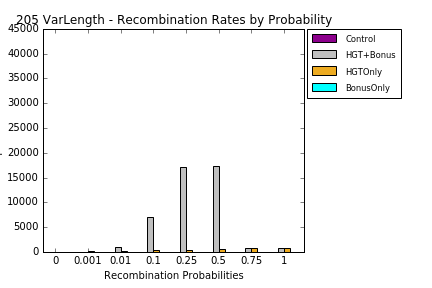

In [31]:
%run ~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Uptakes" \
-t "205 VarLength - Recombination Rates by Probability" --pair --groups=8 \
--ylim_max 45000 \
--xticks="0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="Control,HGT+Bonus,HGTOnly,BonusOnly" \
--columns="1" \
205_recombinations_by_prob.png \
\
P_0_control__uptake_with_recombination.csv \
P_0_hgtbonus__uptake_with_recombination.csv \
P_0_hgt__uptake_with_recombination.csv \
P_0_bonus__uptake_with_recombination.csv \
\
P_0.001_control__uptake_with_recombination.csv \
P_0.001_hgtbonus__uptake_with_recombination.csv \
P_0.001_hgt__uptake_with_recombination.csv \
P_0.001_bonus__uptake_with_recombination.csv \
\
P_0.01_control__uptake_with_recombination.csv \
P_0.01_hgtbonus__uptake_with_recombination.csv \
P_0.01_hgt__uptake_with_recombination.csv \
P_0.01_bonus__uptake_with_recombination.csv \
\
P_0.1_control__uptake_with_recombination.csv \
P_0.1_hgtbonus__uptake_with_recombination.csv \
P_0.1_hgt__uptake_with_recombination.csv \
P_0.1_bonus__uptake_with_recombination.csv \
\
P_0.25_control__uptake_with_recombination.csv \
P_0.25_hgtbonus__uptake_with_recombination.csv \
P_0.25_hgt__uptake_with_recombination.csv \
P_0.25_bonus__uptake_with_recombination.csv \
\
P_0.5_control__uptake_with_recombination.csv \
P_0.5_hgtbonus__uptake_with_recombination.csv \
P_0.5_hgt__uptake_with_recombination.csv \
P_0.5_bonus__uptake_with_recombination.csv \
\
P_0.75_control__uptake_with_recombination.csv \
P_0.75_hgtbonus__uptake_with_recombination.csv \
P_0.75_hgt__uptake_with_recombination.csv \
P_0.75_bonus__uptake_with_recombination.csv \
\
P_1_control__uptake_with_recombination.csv \
P_1_hgtbonus__uptake_with_recombination.csv \
P_1_hgt__uptake_with_recombination.csv \
P_1_bonus__uptake_with_recombination.csv 

ipyImage(filename='205_recombinations_by_prob.png') 

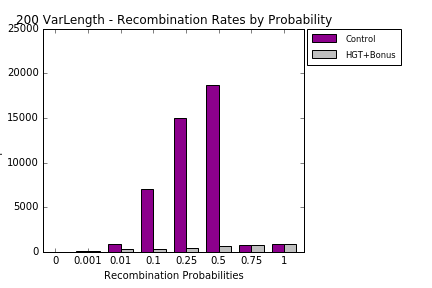

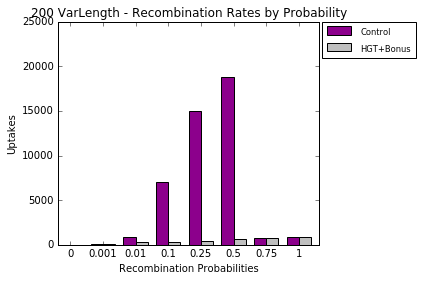

In [29]:
%run ~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Uptakes" \
-t "200 VarLength - Recombination Rates by Probability" --pair --groups=8 \
--ylim_max 25000 \
--xticks="0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="Control,HGT+Bonus,HGTOnly,BonusOnly" \
--columns="1" \
200_relevant_recombinations_by_prob.png \
\
P_0_hgtbonus__uptake_with_recombination.csv \
P_0_hgt__uptake_with_recombination.csv \
\
P_0.001_hgtbonus__uptake_with_recombination.csv \
P_0.001_hgt__uptake_with_recombination.csv \
\
P_0.01_hgtbonus__uptake_with_recombination.csv \
P_0.01_hgt__uptake_with_recombination.csv \
\
P_0.1_hgtbonus__uptake_with_recombination.csv \
P_0.1_hgt__uptake_with_recombination.csv \
\
P_0.25_hgtbonus__uptake_with_recombination.csv \
P_0.25_hgt__uptake_with_recombination.csv \
\
P_0.5_hgtbonus__uptake_with_recombination.csv \
P_0.5_hgt__uptake_with_recombination.csv \
\
P_0.75_hgtbonus__uptake_with_recombination.csv \
P_0.75_hgt__uptake_with_recombination.csv \
\
P_1_hgtbonus__uptake_with_recombination.csv \
P_1_hgt__uptake_with_recombination.csv 

ipyImage(filename='200_relevant_recombinations_by_prob.png') 

## Genome Lengths - Copied and Executed

Aggregating control_c
Aggregating control_e
Aggregating P_0_c
Aggregating P_0_e
Aggregating P_0.001_c
Aggregating P_0.001_e
Aggregating P_0.01_c
Aggregating P_0.01_e
Aggregating P_0.1_c
Aggregating P_0.1_e
Aggregating P_0.5_c
Aggregating P_0.5_e
Aggregating P_1_c
Aggregating P_1_e

Plotting 200_copied_and_exec_size


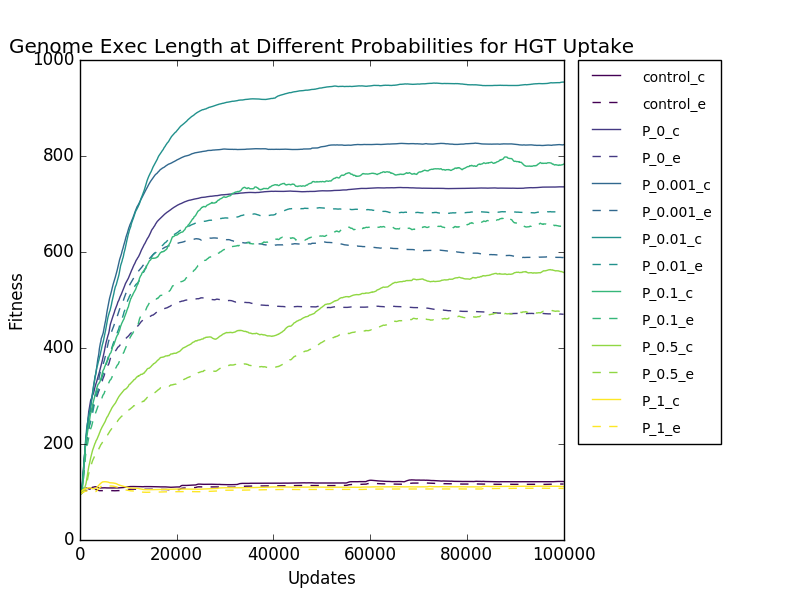

In [32]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py --samples 1000 \
--title "Genome Exec Length at Different Probabilities for HGT Uptake" \
--xlabel "Updates" --ylabel "Fitness" --xtick_multiplier 100 \
--data_members 2 \
200_copied_and_exec_size \
average.dat 7 \"../P_0_control_*/data*/\" control_c \
average.dat 8 \"../P_0_control_*/data*/\" control_e \
average.dat 7 \"../P_0_hgtbonus_*/data*/\" P_0_c \
average.dat 8 \"../P_0_hgtbonus_*/data*/\" P_0_e \
average.dat 7 \"../P_0.001_hgtbonus_*/data*/\" P_0.001_c \
average.dat 8 \"../P_0.001_hgtbonus_*/data*/\" P_0.001_e \
average.dat 7 \"../P_0.01_hgtbonus_*/data*/\" P_0.01_c \
average.dat 8 \"../P_0.01_hgtbonus_*/data*/\" P_0.01_e \
average.dat 7 \"../P_0.1_hgtbonus_*/data*/\" P_0.1_c \
average.dat 8 \"../P_0.1_hgtbonus_*/data*/\" P_0.1_e \
average.dat 7 \"../P_0.5_hgtbonus_*/data*/\" P_0.5_c \
average.dat 8 \"../P_0.5_hgtbonus_*/data*/\" P_0.5_e \
average.dat 7 \"../P_1_hgtbonus_*/data*/\" P_1_c \
average.dat 8 \"../P_1_hgtbonus_*/data*/\" P_1_e 

ipyImage(filename='200_copied_and_exec_size.png') 

In [34]:
for p in ['0', '0.001', '0.01', '0.1', '0.25', '0.5', '0.75', '1']:
    for t in ['hgtbonus', 'hgt']:
        PROB = "P_" + p + "_" + t
        print PROB
        
        outfile1 = PROB + "__genome_length_executed.csv"
        !rm {outfile1}
        outfile2 = PROB + "__genome_length_copied.csv"
        !rm {outfile2}
        
        files = !ls ../{PROB}_200*/data_*/average.dat
        files_string = " ".join(files)

        !python2 ~/Dropbox/School_Docs/Research/research_scripts/common/extract_single_column_to_csv.py \
        --end 7 {files_string} \
        >> {outfile1}
        
        !python2 ~/Dropbox/School_Docs/Research/research_scripts/common/extract_single_column_to_csv.py \
        --end 8 {files_string} \
        >> {outfile2}


P_0_hgtbonus
P_0_hgt
P_0.001_hgtbonus
P_0.001_hgt
P_0.01_hgtbonus
P_0.01_hgt
P_0.1_hgtbonus
P_0.1_hgt
P_0.25_hgtbonus
P_0.25_hgt
P_0.5_hgtbonus
P_0.5_hgt
P_0.75_hgtbonus
P_0.75_hgt
P_1_hgtbonus
P_1_hgt


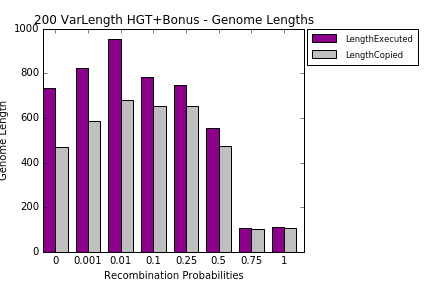

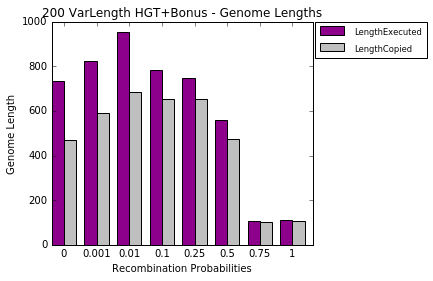

In [37]:
%run ~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Genome Length" \
-t "200 VarLength HGT+Bonus - Genome Lengths" --pair --groups=8 \
--xticks="0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="LengthExecuted,LengthCopied" \
--columns="1" \
200_genome_lengths.png \
P_0_hgtbonus__genome_length_executed.csv \
P_0_hgtbonus__genome_length_copied.csv \
P_0.001_hgtbonus__genome_length_executed.csv \
P_0.001_hgtbonus__genome_length_copied.csv \
P_0.01_hgtbonus__genome_length_executed.csv \
P_0.01_hgtbonus__genome_length_copied.csv \
P_0.1_hgtbonus__genome_length_executed.csv \
P_0.1_hgtbonus__genome_length_copied.csv \
P_0.25_hgtbonus__genome_length_executed.csv \
P_0.25_hgtbonus__genome_length_copied.csv \
P_0.5_hgtbonus__genome_length_executed.csv \
P_0.5_hgtbonus__genome_length_copied.csv \
P_0.75_hgtbonus__genome_length_executed.csv \
P_0.75_hgtbonus__genome_length_copied.csv \
P_1_hgtbonus__genome_length_executed.csv \
P_1_hgtbonus__genome_length_copied.csv

ipyImage(filename='200_genome_lengths.png') 

## HGT Uptake Instruction Counts and Proportions

In [38]:
for p in ['0', '0.001', '0.01', '0.1', '0.25', '0.5', '0.75', '1']:
    for t in ['hgtbonus', 'hgt']:
        PROB = "P_" + p + "_" + t
        print PROB
        !rm {PROB}_HGT_instructions.csv
        files = !ls ../{PROB}_200*/data_*/living_*

        for f in files:
            !python2 ~/Dropbox/School_Docs/Research/research_scripts/common/count_instructions.py "A" {f} \
            >> {PROB}_HGT_instructions.csv

P_0_hgtbonus
rm: cannot remove ‘P_0_hgtbonus_HGT_instructions.csv’: No such file or directory
Traceback (most recent call last):
  File "/home/rosiec/Dropbox/School_Docs/Research/research_scripts/common/count_instructions.py", line 41, in <module>
    fd = open(inputfilename)
IOError: [Errno 2] No such file or directory: 'ls:'
P_0_hgt
rm: cannot remove ‘P_0_hgt_HGT_instructions.csv’: No such file or directory
Traceback (most recent call last):
  File "/home/rosiec/Dropbox/School_Docs/Research/research_scripts/common/count_instructions.py", line 41, in <module>
    fd = open(inputfilename)
IOError: [Errno 2] No such file or directory: 'ls:'
P_0.001_hgtbonus
rm: cannot remove ‘P_0.001_hgtbonus_HGT_instructions.csv’: No such file or directory
Traceback (most recent call last):
  File "/home/rosiec/Dropbox/School_Docs/Research/research_scripts/common/count_instructions.py", line 41, in <module>
    fd = open(inputfilename)
IOError: [Errno 2] No such file or directory: 'ls:'
P_0.001_hgt
rm:

In [40]:
for p in ['0', '0.001', '0.01', '0.1', '0.25', '0.5', '0.75', '1']:
    for t in ['control', 'hgtbonus', 'hgt', 'bonus']:
        PROB = "P_" + p + "_" + t
        print PROB
        !rm {PROB}_HGT_proportion_instructions.csv
        files = !ls ../{PROB}_205*/data_*/living_*
    
        #print files
        
        for f in files:
            !python2 ~/Dropbox/School_Docs/Research/research_scripts/common/count_instructions.py -p "A" {f} \
            >> {PROB}_HGT_proportion_instructions.csv

P_0_control
rm: cannot remove ‘P_0_control_HGT_proportion_instructions.csv’: No such file or directory
P_0_hgtbonus
rm: cannot remove ‘P_0_hgtbonus_HGT_proportion_instructions.csv’: No such file or directory
P_0_hgt
rm: cannot remove ‘P_0_hgt_HGT_proportion_instructions.csv’: No such file or directory
P_0_bonus
rm: cannot remove ‘P_0_bonus_HGT_proportion_instructions.csv’: No such file or directory
P_0.001_control
P_0.001_hgtbonus
P_0.001_hgt
P_0.001_bonus
P_0.01_control
P_0.01_hgtbonus
P_0.01_hgt
Traceback (most recent call last):
  File "/home/rosiec/Dropbox/School_Docs/Research/research_scripts/common/count_instructions.py", line 72, in <module>
    print proportions/orgs
ZeroDivisionError: float division by zero
P_0.01_bonus
P_0.1_control
P_0.1_hgtbonus
P_0.1_hgt
P_0.1_bonus
P_0.25_control
P_0.25_hgtbonus
P_0.25_hgt
P_0.25_bonus
P_0.5_control
P_0.5_hgtbonus
P_0.5_hgt
P_0.5_bonus
P_0.75_control
P_0.75_hgtbonus
P_0.75_hgt
P_0.75_bonus
P_1_control
rm: cannot remove ‘P_1_control_HGT_pr

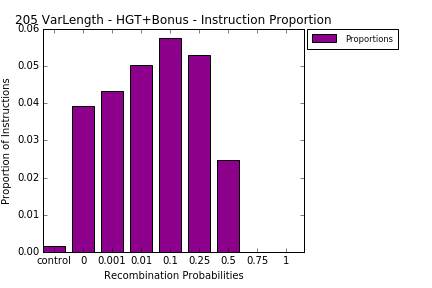

In [43]:
%run ~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Proportion of Instructions" \
-t "205 VarLength - HGT+Bonus - Instruction Proportion" --pair --groups=9 \
--xticks="control,0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="Proportions" \
--columns="1" \
205_values_and_proportions_HGT_inst.png \
P_0_control_HGT_proportion_instructions.csv \
P_0_hgtbonus_HGT_proportion_instructions.csv \
P_0.001_hgtbonus_HGT_proportion_instructions.csv \
P_0.01_hgtbonus_HGT_proportion_instructions.csv \
P_0.1_hgtbonus_HGT_proportion_instructions.csv \
P_0.25_hgtbonus_HGT_proportion_instructions.csv \
P_0.5_hgtbonus_HGT_proportion_instructions.csv \
P_0.75_hgtbonus_HGT_proportion_instructions.csv \
P_1_hgtbonus_HGT_proportion_instructions.csv


ipyImage(filename='205_values_and_proportions_HGT_inst.png') 

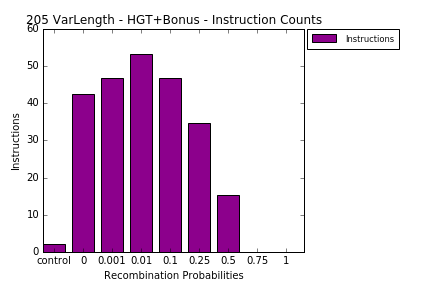

In [44]:
%run ~/Dropbox/School_Docs/Research/research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Instructions" \
-t "205 VarLength - HGT+Bonus - Instruction Counts" --pair --groups=9 \
--xticks="control,0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="Instructions" \
--columns="1" \
205_counts_HGT_inst.png \
P_0_control_HGT_instructions.csv \
P_0_hgtbonus_HGT_instructions.csv \
P_0.001_hgtbonus_HGT_instructions.csv \
P_0.01_hgtbonus_HGT_instructions.csv \
P_0.1_hgtbonus_HGT_instructions.csv \
P_0.25_hgtbonus_HGT_instructions.csv \
P_0.5_hgtbonus_HGT_instructions.csv \
P_0.75_hgtbonus_HGT_instructions.csv \
P_1_hgtbonus_HGT_instructions.csv

ipyImage(filename='205_counts_HGT_inst.png') 

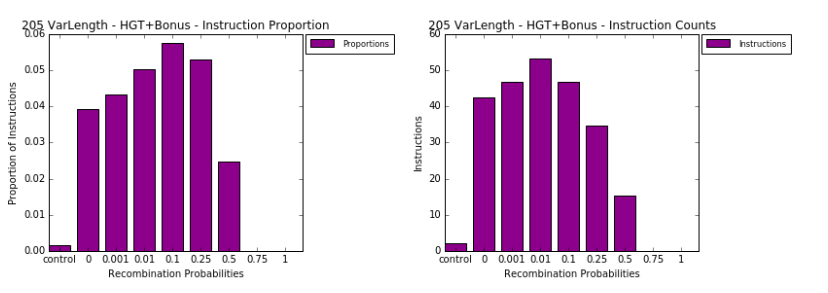

In [46]:
files2 = ['205_values_and_proportions_HGT_inst.png',
 '205_counts_HGT_inst.png']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=-0.5, wspace=-0.45)
for i, ax in enumerate(axes.flat, start=1):
    
    if i-1 < len(files):
        img = Image.open(files2[i-1])
        ax.imshow(img)

    ax.set_axis_off() 
    i+=1
plt.show()